<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 6

### Problem 0 (3 points)

## Part 1: Regularization in Logistic Regression Classification 

In [1]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall22', course='371', homework=6):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [2]:
import pickle

scalar_data_file = 'non_separable.pickle'
retrieve(scalar_data_file)
with open(scalar_data_file, 'rb') as file:
    scalar_data = pickle.load(file)
    
ad_data_file = 'ad.pickle'
retrieve(ad_data_file)
with open(ad_data_file, 'rb') as file:
    ad_data = pickle.load(file)

Using previously downloaded file non_separable.pickle
Using previously downloaded file ad.pickle


In [3]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Problem 1.1

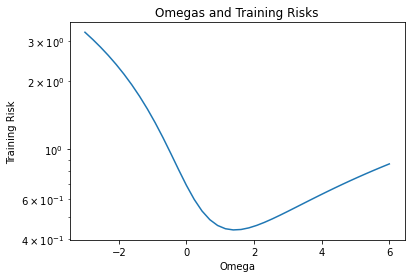

In [18]:
import numpy as np 

def alpha(beta, omega, x): 
    return beta + omega * x

def risk_function(x, y, omega):
    return np.log(1 + np.exp(-alpha(0, omega, x))) + (1 - y) * alpha(0, omega, x)

def plot_omegas_and_risks(data):
    omegas = np.linspace(-3, 6, 40)
    training_risks = []
    N = len(data['x'])

    for omega in omegas: 
        loss_sum = 0
        for i in range(0, N): 
            x = data['x'][i]
            y = data['y'][i]
            loss_sum += risk_function(x, y, omega)
        training_risks.append(loss_sum / N)

    plt.semilogy(omegas, training_risks)
    plt.title('Omegas and Training Risks')
    plt.xlabel('Omega')
    plt.ylabel('Training Risk')
    plt.show()

plot_omegas_and_risks(scalar_data)
    

### Problem 1.2

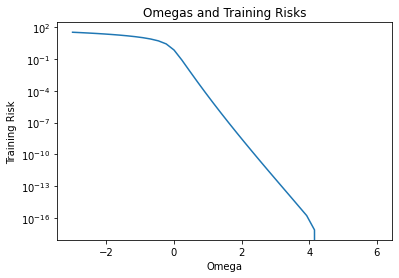

In [19]:
import copy 

seperable_data = copy.deepcopy(scalar_data)
for i in range(0, len(seperable_data['x'])):
    if seperable_data['y'][i] == 1: 
        seperable_data['x'][i] += 10
    else:
        seperable_data['x'][i] -= 10
        
plot_omegas_and_risks(seperable_data)

### Problem 1.3

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

def train_and_test(data, cs=10000, folds=None, max_iter=10000):
    
    if isinstance(cs, int): 
        h = LogisticRegression(C=cs, max_iter=max_iter)     
        h.fit(data['train']['x'], data['train']['y'])
        
        for dataset in ('train', 'test'):
            accuracy = h.score(data[dataset]['x'], data[dataset]['y'])
            print('{} empirical_accuracy is {:.2f} percent'.format(dataset, accuracy * 100))
        return h
    
    else: 
        h = LogisticRegressionCV(Cs=cs, cv=folds, max_iter=max_iter)
        h.fit(data['train']['x'], data['train']['y'])
        
        for dataset in ('train', 'test'):
            accuracy = h.score(data[dataset]['x'], data[dataset]['y'])
            print('{} empirical_accuracy is {:.2f} percent'.format(dataset, accuracy * 100))
        return h




In [7]:
lrc = train_and_test(ad_data)

train empirical_accuracy is 99.41 percent
test empirical_accuracy is 95.00 percent


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_cv(h):
    best_c, c_values, scores = h.C_[0], h.Cs_, h.scores_[1]
    best_index = np.where(c_values == best_c)[0][0]
    
    print('Best value of C: {}'.format(best_c))
    print(c_values)
    
    mean_scores = np.mean(scores, axis=0)
    error_scores = np.std(scores, axis=0)
    
    plt.plot(c_values, mean_scores)
    plt.errorbar(c_values, mean_scores, yerr = error_scores)
    plt.plot(best_c, mean_scores[best_index], 'ro')
    plt.gca().set_xscale('log')
    plt.show()
    


train empirical_accuracy is 99.15 percent
test empirical_accuracy is 96.78 percent
Best value of C: 0.1
[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


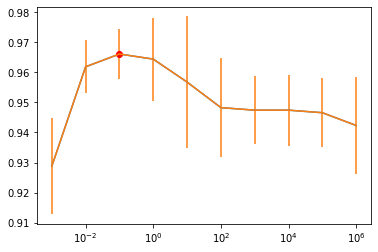

In [17]:
c_candidates = np.logspace(-3, 6, num=10)
lrc = train_and_test(ad_data, c_candidates, folds=5)
analyze_cv(lrc)

## Part 2: The Bootstrap

In [ ]:
times_file = 'times.pickle'
retrieve(times_file)
with open(times_file, 'rb') as file:
    times = pickle.load(file)
n = len(times)

In [ ]:
m_hat = np.mean(times)
print('estimated wait time {:.4f} seconds'.format(m_hat))

### Problem 2.1

### Problem 2.2 (Exam Style)

### Problem 2.3

### Problem 2.4 (Exam Style)

### Problem 2.5

### Problem 2.6

### Problem 2.7 (Exam Style Except for the Code)